In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5),(0.5))])

batch_size = 128
epochs = 20

# Load datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Print images from dataset and their labels

torch.Size([128, 1, 28, 28]) torch.Size([128])


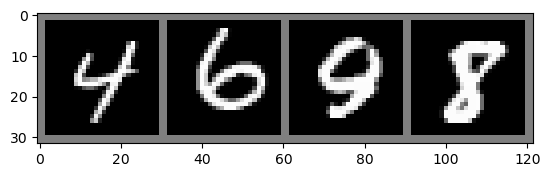

4 6 9 8


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

# show images
imshow(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join(f'{labels[j]:1d}' for j in range(4)))

# LeNet-300-100

In [4]:
from models.lenet import LeNet300

net = LeNet300(10)
# Try to get GPU device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cuda:0


LeNet300(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=10, bias=True)
)

In [5]:
import torch.optim as optim
import torch.nn.functional as F

loss_fn = F.cross_entropy
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
from train import training_loop

loss, train_acc, val_acc = training_loop(epochs,net,optimizer,device,trainloader,testloader,loss_fn,100
                                         ,'checkpoints/mnist_lenet300.pth')

***Epoch: 001/020 | Batch:0000/0469 | Loss: 2.330
***Epoch: 001/020 | Batch:0100/0469 | Loss: 1.800
***Epoch: 001/020 | Batch:0200/0469 | Loss: 1.396
***Epoch: 001/020 | Batch:0300/0469 | Loss: 1.234
***Epoch: 001/020 | Batch:0400/0469 | Loss: 1.269
***Epoch: 001/020 | Train. Acc.: 67.618% | Loss: 1.080
Epoch: 001/020 | Train accuracy: 67.62% | Validation accuracy: 67.82% | Train loss: 1.080% | Validation loss: 1.070% | Best Validation (Ep. 000): -inf%
Time elapsed: 0.29 min
***Epoch: 002/020 | Batch:0000/0469 | Loss: 1.139
***Epoch: 002/020 | Batch:0100/0469 | Loss: 0.907
***Epoch: 002/020 | Batch:0200/0469 | Loss: 0.826
***Epoch: 002/020 | Batch:0300/0469 | Loss: 0.945
***Epoch: 002/020 | Batch:0400/0469 | Loss: 0.827
***Epoch: 002/020 | Train. Acc.: 78.103% | Loss: 0.702
Epoch: 002/020 | Train accuracy: 78.10% | Validation accuracy: 78.43% | Train loss: 0.702% | Validation loss: 0.686% | Best Validation (Ep. 001): 67.82%
Time elapsed: 0.54 min
***Epoch: 003/020 | Batch:0000/0469 | L

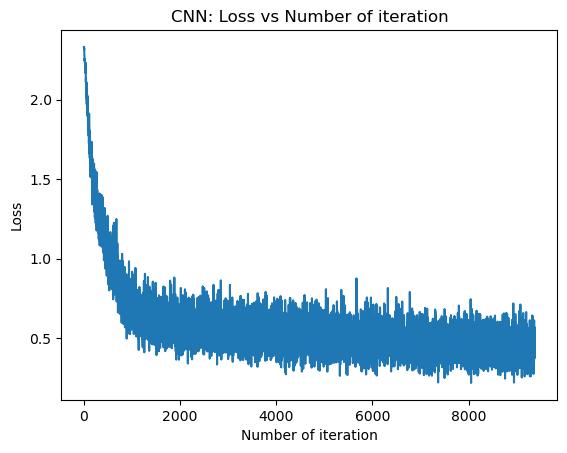

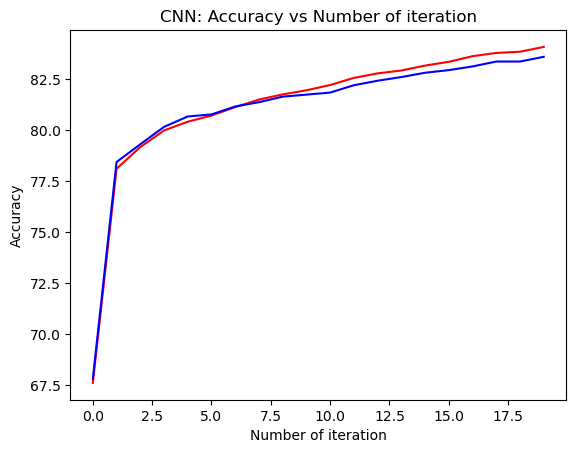

In [7]:
# visualization loss
plt.plot(loss)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(train_acc,color = "red")
plt.plot(val_acc,color = "blue")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

# LeNet-5

Images need to be rescaled to size 32x32 as described in LeCun et al. 1998

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5),(0.5)),
     transforms.Resize(32)])
# Load datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

torch.Size([128, 1, 32, 32]) torch.Size([128])


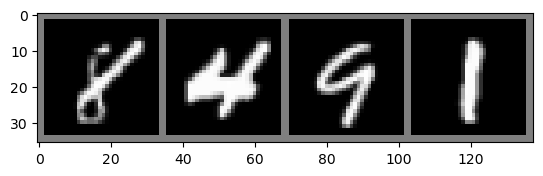

8 4 9 1


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

# show images
imshow(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join(f'{labels[j]:1d}' for j in range(4)))

In [10]:
from models.lenet import LeNet5

net = LeNet5(10)
# Try to get GPU device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cuda:0


LeNet5(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=400, out_features=120, bias=True)
  (relu): ReLU()
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
from train import training_loop

loss_fn = F.cross_entropy
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

loss, train_acc, val_acc = training_loop(epochs,net,optimizer,device,trainloader,testloader,loss_fn,100
                                         ,'checkpoints/mnist_lenet5.pth')

***Epoch: 001/020 | Batch:0000/0469 | Loss: 2.297
***Epoch: 001/020 | Batch:0100/0469 | Loss: 2.110
***Epoch: 001/020 | Batch:0200/0469 | Loss: 1.646
***Epoch: 001/020 | Batch:0300/0469 | Loss: 0.896
***Epoch: 001/020 | Batch:0400/0469 | Loss: 0.489
***Epoch: 001/020 | Train. Acc.: 89.655% | Loss: 0.427
Epoch: 001/020 | Train accuracy: 89.65% | Validation accuracy: 90.29% | Train loss: 0.427% | Validation loss: 0.399% | Best Validation (Ep. 000): -inf%
Time elapsed: 0.38 min
***Epoch: 002/020 | Batch:0000/0469 | Loss: 0.379
***Epoch: 002/020 | Batch:0100/0469 | Loss: 0.467
***Epoch: 002/020 | Batch:0200/0469 | Loss: 0.302
***Epoch: 002/020 | Batch:0300/0469 | Loss: 0.213
***Epoch: 002/020 | Batch:0400/0469 | Loss: 0.202
***Epoch: 002/020 | Train. Acc.: 95.162% | Loss: 0.178
Epoch: 002/020 | Train accuracy: 95.16% | Validation accuracy: 95.70% | Train loss: 0.178% | Validation loss: 0.160% | Best Validation (Ep. 001): 90.29%
Time elapsed: 0.72 min
***Epoch: 003/020 | Batch:0000/0469 | L

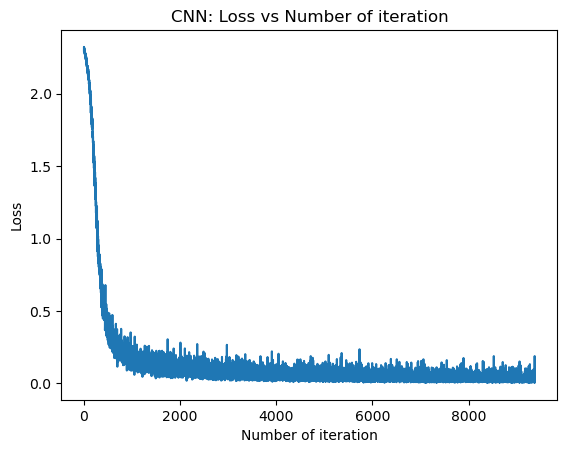

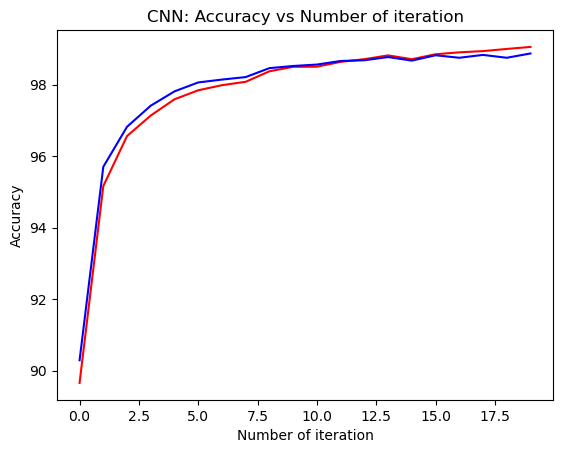

In [12]:
# visualization loss
plt.plot(loss)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(train_acc,color = "red")
plt.plot(val_acc,color = "blue")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()